# Optimize at fixed tuning parameter value(s)

`lsq_constrsparsereg.jl` fits constrained lasso

$$\begin{split}
& \text{minimize} \hspace{1em} \frac{1}{2}||\boldsymbol{y}-\boldsymbol{X\beta}||^2_2 + \rho||\beta||_1 \\
& \text{ subject to} \hspace{0.5em} \boldsymbol{A\beta}=\boldsymbol{b} \text{ and } \boldsymbol{C\beta} \leq \boldsymbol{d}
\end{split}$$

at a fixed tuning parameter value $\rho$ or several tuning parameter values provided by user.

### Single tuning parameter value

We demonstrate the usage of a single tuning parameter value with a sum-to-zero constraint example defined as 

$$\begin{split}
& \text{minimize} \hspace{1em} \frac{1}{2}||\boldsymbol{y}-\boldsymbol{X\beta}||^2_2 + \rho||\beta||_1 \\
& \text{ subject to} \hspace{0.5em} \sum_j \beta_j = 0.
\end{split}$$

First, let's define a true parameter `β` such that `sum(β) = 0`.

In [ ]:
using ConstrainedLasso, Base.Test

In [9]:
n, p = 50, 100  
β = zeros(p)
β[1:round(Int, p / 4)] = 0
β[(round(Int, p / 4) + 1):round(Int, p / 2)] = 1
β[(round(Int, p / 2) + 1):round(Int, 3p / 4)] = 0
β[(round(Int, 3p / 4) + 1):p] = -1
β

100-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮  
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

Next we generate data based on the true parameter `β`.

In [10]:
srand(41)
X = randn(n, p)

50×100 Array{Float64,2}:
  1.21212    -0.153889    0.141533  …  -0.458125    0.0951976  -2.14019   
  0.345895    1.30676     1.60944      -0.409901    0.323719    0.989333  
 -1.27859    -1.18894     0.512064      1.80509     1.62606    -1.44251   
  0.230616    2.54741    -0.523533      2.73358     1.07999     0.432834  
 -1.17103    -0.39082     0.441921     -0.179239   -0.158189   -0.640611  
  1.67135     0.0829011   0.964089  …  -0.720038    1.99359    -0.671572  
 -0.614717    2.16204    -0.0602       -0.324456   -0.616887    1.11243   
 -0.810535    0.974719   -0.045405      0.881578    1.29611     0.696869  
 -1.10879    -1.32489    -1.18272       0.579381   -0.971269   -0.687591  
 -0.219752   -0.447897   -0.974186     -0.880804   -0.480702   -1.36887   
  0.0952544  -0.126203   -0.273737  …  -0.264421    0.565684   -0.798719  
  1.4126      0.295896   -0.213161     -1.46343    -1.27144    -0.0589753 
 -0.418407   -0.479389    0.324243      1.96976     0.867659   -1.2999    


In [11]:
y = X * β + randn(n)

50-element Array{Float64,1}:
  -9.90585 
  -5.40562 
   5.24289 
  -6.29951 
  -4.9586  
  -6.1342  
  -7.90981 
   2.51009 
  -5.79548 
   1.61355 
  -0.722766
  10.4522  
   4.03935 
   ⋮       
   0.397781
  -2.6661  
   5.36896 
  -3.56537 
  -2.402   
   0.11478 
  -5.39248 
   4.38391 
   0.706801
 -10.1066  
  -1.12558 
  14.2473  

Since the equality constraint can be written as 

$$\begin{split}
\begin{pmatrix} 1 & 1 & \cdots & 1 \end{pmatrix} \beta = 0,
\end{split}$$

we define the constraint as below.

In [12]:
beq   = 0.0
Aeq   = ones(1, p)

1×100 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

Now we are ready to fit the constrained lasso problem, say at `ρ=10`.

In [ ]:
ρ = 10.0
β̂, = lsq_constrsparsereg(X, y, ρ; Aeq = Aeq, beq = beq);

In [7]:
β̂

100×1 Array{Float64,2}:
  0.0332021  
  3.10012e-10
 -4.6978e-10 
 -0.39502    
 -2.56803e-10
 -5.22472e-11
 -5.31822e-10
 -4.24518e-11
  0.288476   
 -6.96174e-10
 -1.18309e-10
 -4.8233e-11 
 -6.46568e-11
  ⋮          
 -0.188338   
 -2.37826e-9 
 -1.60819e-9 
  1.41678e-10
 -0.84392    
 -0.645577   
 -0.257303   
 -1.43023e-10
 -1.13316    
  4.26293e-10
 -3.84653e-10
  2.17566e-9 

We see if the sum of estimated $\beta$ coefficients is approximately equal to 0.

In [8]:
@test sum(β̂)≈0.0 atol=1e-6

Test Passed


### Multiple tuning parameter values

Define `ρlist` to be a decreasing sequence of values from 152.0 to 2.0.

In [14]:
ρlist = 152.0:-15.0:2.0

152.0:-15.0:2.0

Using the same equality constraints, we fit the constrained lasso.

In [ ]:
β̂, = lsq_constrsparsereg(X, y, ρlist; Aeq = Aeq, beq = beq);

In [16]:
β̂

100×11 Array{Float64,2}:
  5.7885e-8    9.72387e-9    2.81065e-10  …   2.48441e-8    1.51451e-8 
 -5.87852e-8  -1.31342e-8   -3.79759e-10     -4.08278e-10   0.178717   
 -3.38004e-8  -7.55024e-9   -2.09421e-10     -5.52919e-9   -1.02944e-9 
 -8.00996e-8  -1.8626e-8    -6.07662e-10     -0.330981     -0.414043   
 -1.46534e-7  -4.13375e-8   -1.40985e-9      -5.87274e-9   -3.33221e-10
  1.35681e-7   2.5494e-8     8.8654e-10   …   1.77541e-9   -4.14188e-10
 -7.15503e-8  -1.62251e-8   -4.70464e-10     -9.09917e-9    3.28018e-11
 -3.43517e-8  -7.81034e-9   -2.37254e-10     -1.42302e-9    8.38037e-11
  9.96051e-8   1.79582e-8    6.78349e-10      0.205806      0.335375   
 -9.85721e-9  -2.84963e-9   -6.60348e-11     -4.06107e-9   -0.157908   
 -5.23226e-8  -1.19088e-8   -3.45603e-10  …  -5.93287e-10  -2.44739e-9 
  7.14349e-9   4.03781e-10  -2.60167e-11     -4.83948e-10  -8.79003e-10
 -1.71432e-8  -4.23818e-9   -1.15154e-10     -3.84297e-10  -8.17787e-10
  ⋮                                    


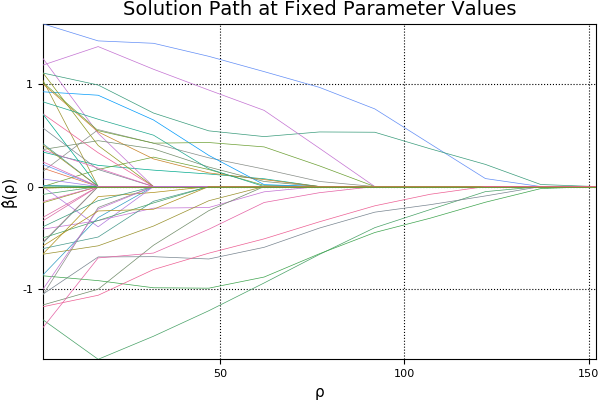

In [17]:
using Plots; pyplot();
plot(ρlist, β̂', label="", xaxis = ("ρ", (minimum(ρlist),
      maximum(ρlist))), yaxis = ("β̂(ρ)"), width=0.5) 
title!("Solution Path at Fixed Parameter Values") 

In [36]:
savefig("misc/fixed.svg")

*Follow the [link](https://github.com/Hua-Zhou/ConstrainedLasso.jl/blob/master/docs/src/demo/fixedparam.ipynb) to access the .ipynb file of this page.*